조개의 나이 예측  
나이테 수를 세어 결정  
날씨 패턴/ 서식지 위치-먹이랑 관련 같은 정보가 문제 해결에 도움이 될수도  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import koreanize_matplotlib

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('Problem.csv')
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
1,F,0.625,0.485,0.160,1.2540,0.5910,0.2590,0.3485,9
2,I,0.500,0.375,0.140,0.5590,0.2375,0.1350,0.1690,9
3,M,0.715,0.520,0.180,1.6000,0.7080,0.3525,0.4450,12
4,M,0.630,0.510,0.175,1.3415,0.6575,0.2620,0.3750,10
...,...,...,...,...,...,...,...,...,...
3127,I,0.580,0.445,0.150,0.8865,0.3830,0.2090,0.2550,11
3128,F,0.490,0.390,0.135,0.5900,0.2150,0.1250,0.1845,12
3129,I,0.425,0.325,0.105,0.3975,0.1815,0.0810,0.1175,7
3130,F,0.595,0.440,0.135,0.9640,0.5005,0.1715,0.2575,10


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole_weight    3132 non-null   float64
 5   Shucked_weight  3132 non-null   float64
 6   Viscera_weight  3132 non-null   float64
 7   Shell_weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


### 이상치 제거

In [107]:
df.min()

Sex                    F
Length             0.075
Diameter           0.055
Height               0.0
Whole_weight       0.002
Shucked_weight     0.001
Viscera_weight    0.0005
Shell_weight      0.0015
Rings                2.5
dtype: object

In [37]:
df = df[df['Height']>0]

In [38]:
#전체 무게는 나머지 무게 합한거보다 크거나 같아야되지 않을까
#df = df[df['Whole_weight'] >= df['Shucked_weight'] + df['Shell_weight']+df['Viscera_weight']]

성별 - 성장 속도/생리적 변화가 성별에 따라 다를수도  
신진대사율이 낮으면 성장속도가 느림 - 나이가 적음.

In [39]:
df =df.reset_index()

In [40]:
del df['index']

In [41]:
#일단 성별만 0/1로 바꾸기
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
encoded = oh.fit_transform(df[['Sex']])  # DataFrame 형태로 전달
encoded_df = pd.DataFrame(encoded.toarray(), columns=oh.get_feature_names_out())
encoded_df

,Sex_F,Sex_I,Sex_M
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
3011,0.0,1.0,0.0
3012,1.0,0.0,0.0
3013,0.0,1.0,0.0
3014,1.0,0.0,0.0


In [42]:
df = pd.concat([df,encoded_df],axis = 1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0.0,1.0,0.0
1,F,0.625,0.485,0.160,1.2540,0.5910,0.2590,0.3485,9,1.0,0.0,0.0
2,I,0.500,0.375,0.140,0.5590,0.2375,0.1350,0.1690,9,0.0,1.0,0.0
3,M,0.715,0.520,0.180,1.6000,0.7080,0.3525,0.4450,12,0.0,0.0,1.0
4,M,0.630,0.510,0.175,1.3415,0.6575,0.2620,0.3750,10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3011,I,0.580,0.445,0.150,0.8865,0.3830,0.2090,0.2550,11,0.0,1.0,0.0
3012,F,0.490,0.390,0.135,0.5900,0.2150,0.1250,0.1845,12,1.0,0.0,0.0
3013,I,0.425,0.325,0.105,0.3975,0.1815,0.0810,0.1175,7,0.0,1.0,0.0
3014,F,0.595,0.440,0.135,0.9640,0.5005,0.1715,0.2575,10,1.0,0.0,0.0


In [43]:
del df['Sex']

In [44]:
# 길이 관련
df['Len^2'] = df['Length']**2
df['Dia^2'] = df['Diameter']**2
df['Hei^2'] = df['Height']**2

In [122]:
#2. 무게
# Whole weight - 전체 무게  
# Shucked weight - 껍데기 제거하고 무게  - 산란기에 따라 달라질수도 있
# Viscera_weight - 내장 무게  
# Shell_weight - 건조 후 껍데기 무게 


In [45]:
#부피 - 타원
df['Volume'] = (np.pi / 6) * df['Length'] * df['Diameter'] * df['Height']

# 곱
df['Length*Diameter'] = df['Length'] * df['Diameter']
df['Length*Height'] = df['Length'] * df['Height']
df['Diameter*Height'] = df['Diameter'] * df['Height']

# 내부 무게 합계
df['Internal_Weight'] = df['Shucked_weight'] + df['Viscera_weight']

# 내부와 껍질 무게 차이
df['Shell_Weight_Difference'] = df['Whole_weight'] - df['Internal_Weight']

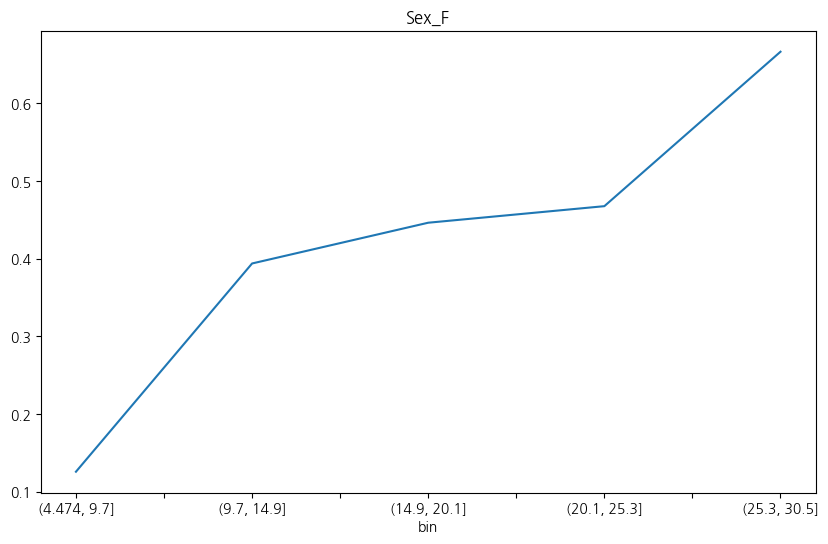

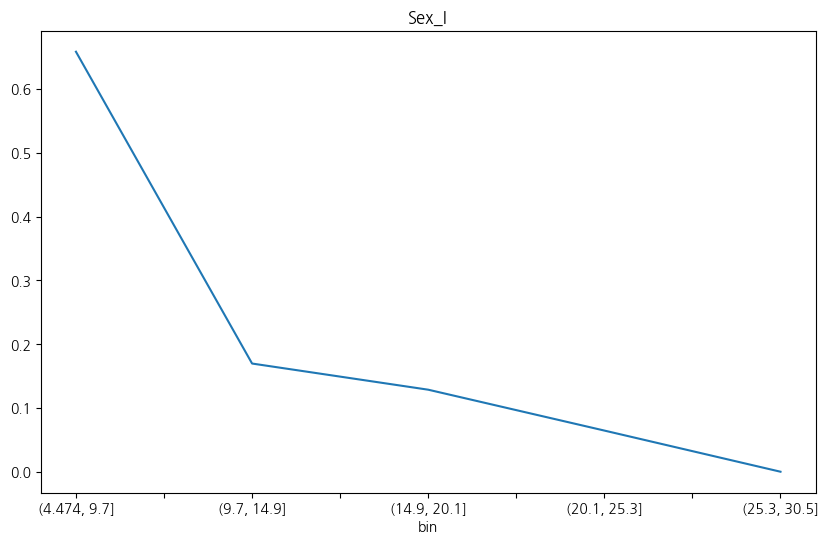

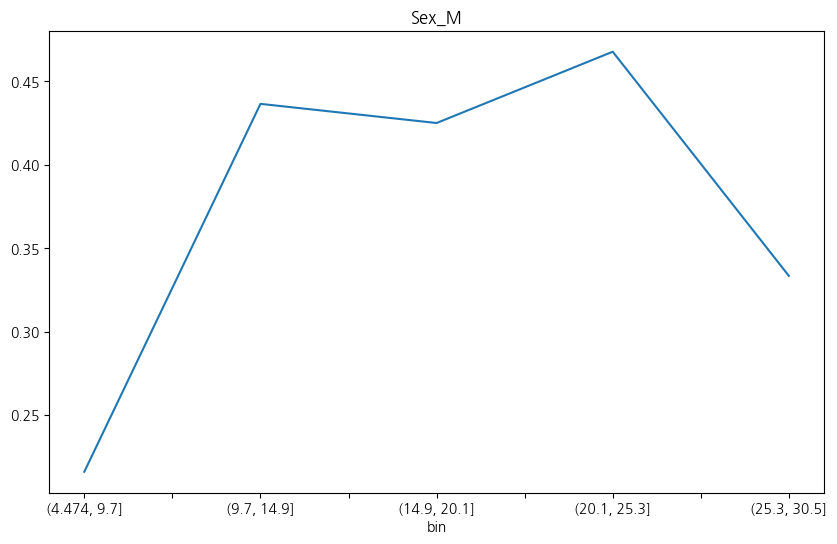

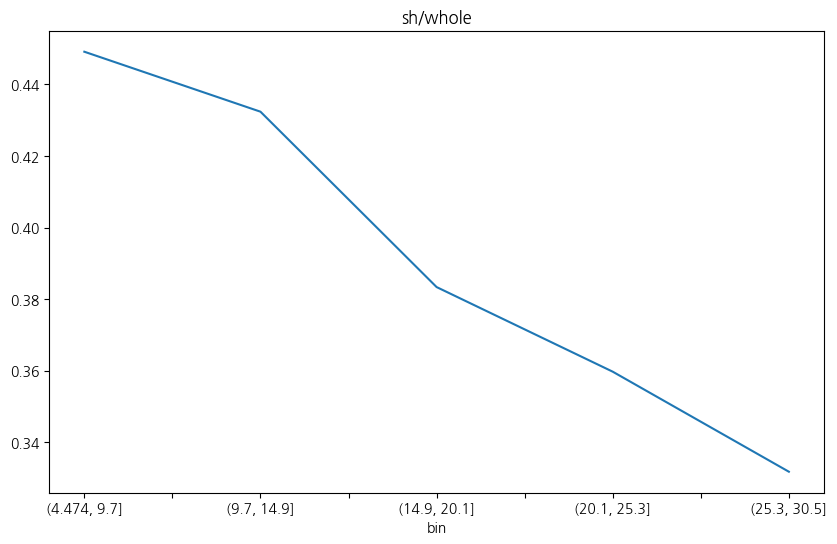

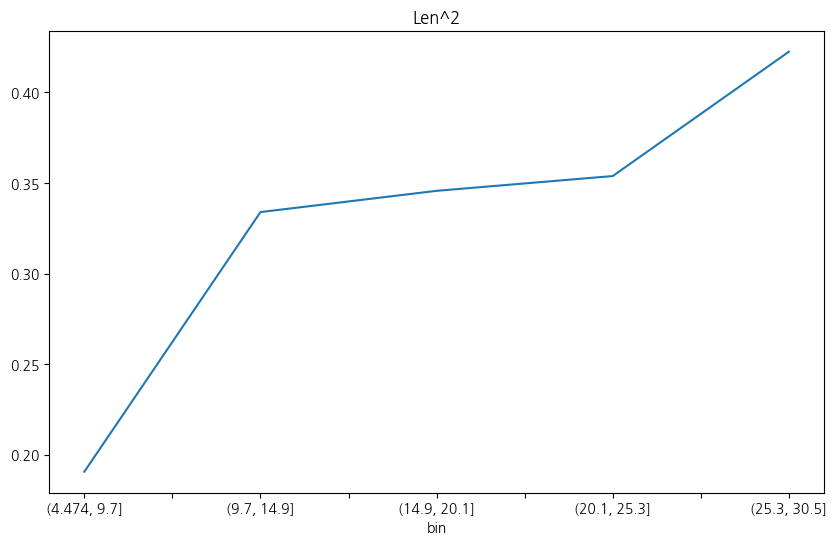

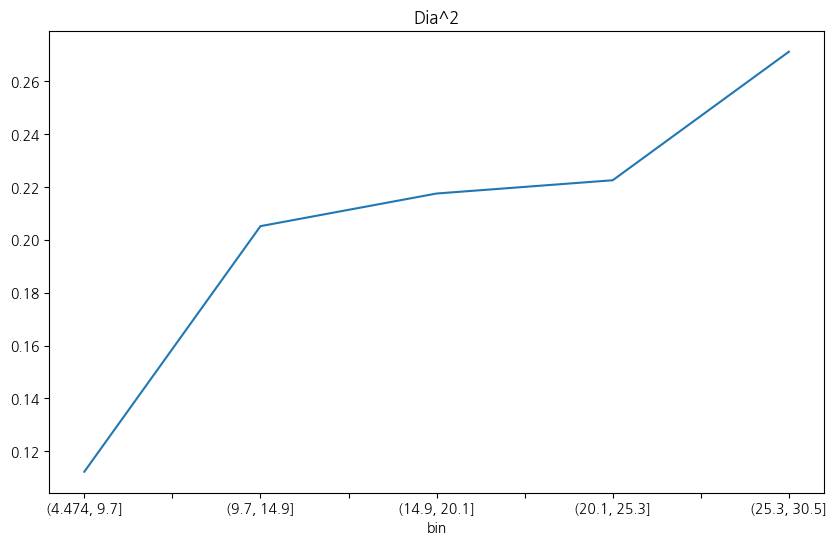

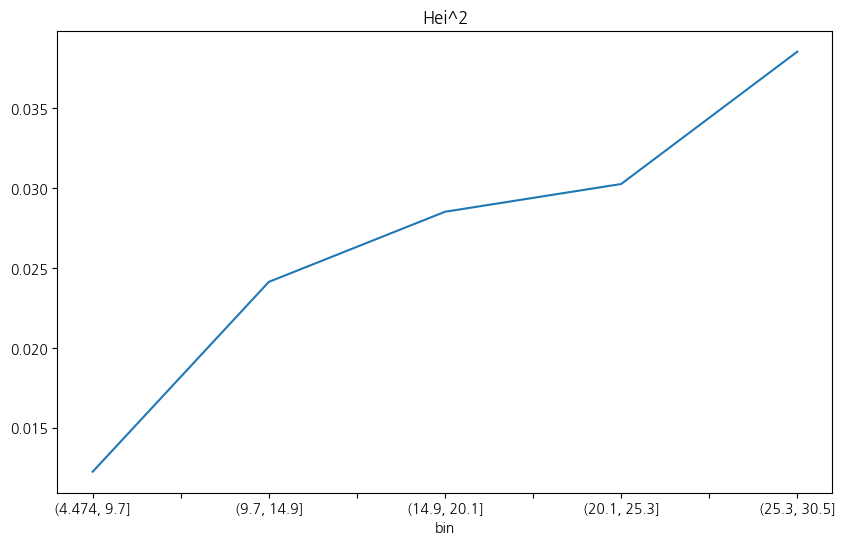

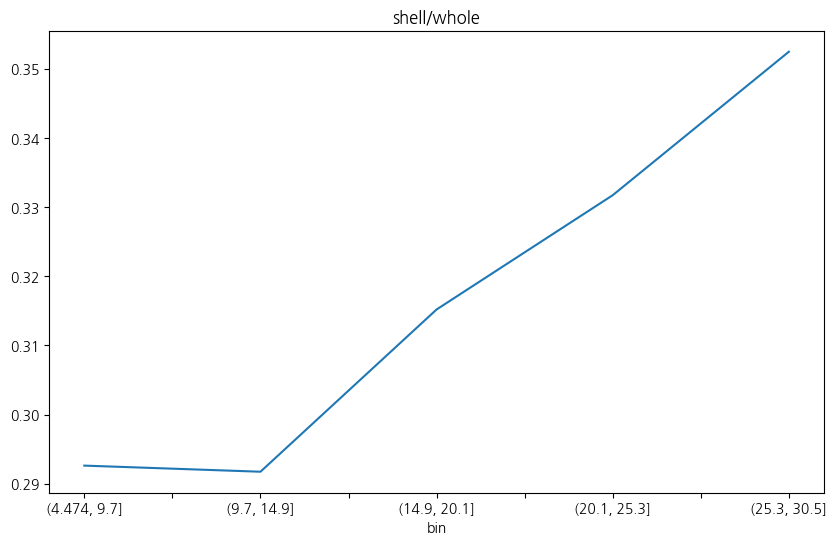

In [235]:
df['bin'] = pd.cut(df['Age'], bins=5)

for c in df.columns[9:17]:
    m_age = df.groupby('bin')[c].mean()
    plt.figure(figsize=(10, 6))
    m_age.plot()
    plt.title(c)
    plt.show()

In [290]:
del df['bin']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Length                   3016 non-null   float64
 1   Diameter                 3016 non-null   float64
 2   Height                   3016 non-null   float64
 3   Whole_weight             3016 non-null   float64
 4   Shucked_weight           3016 non-null   float64
 5   Viscera_weight           3016 non-null   float64
 6   Shell_weight             3016 non-null   float64
 7   Rings                    3016 non-null   int64  
 8   Sex_F                    3016 non-null   float64
 9   Sex_I                    3016 non-null   float64
 10  Sex_M                    3016 non-null   float64
 11  Len^2                    3016 non-null   float64
 12  Dia^2                    3016 non-null   float64
 13  Hei^2                    3016 non-null   float64
 14  Volume                  

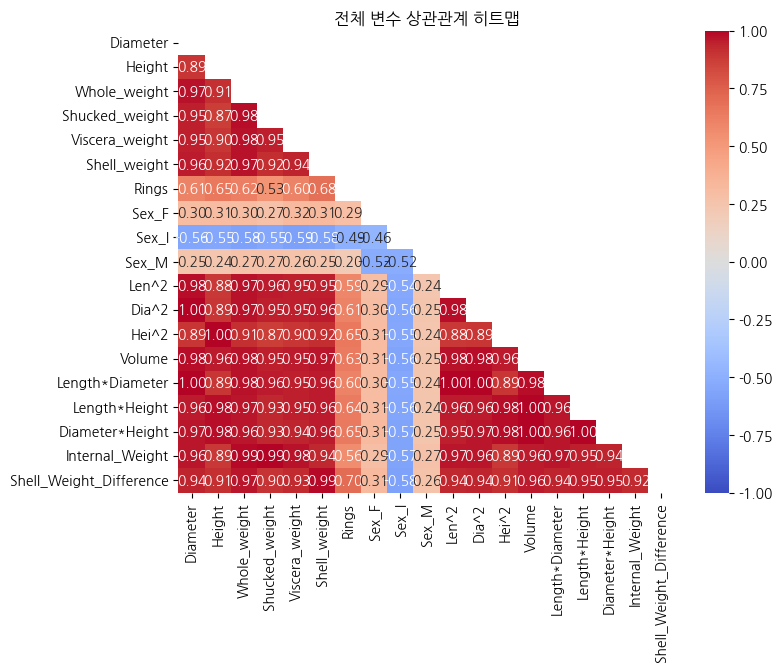

In [124]:
corr_matrix = df.iloc[:,1:].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, vmax=1
)

plt.title("전체 변수 상관관계 히트맵")
plt.show()

In [47]:
df.to_excel('add_fea_0414.xlsx',index=False)

## 모델 

In [ ]:
df  = pd.read_excel('add_fea_0414.xlsx')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = df.drop(['Rings'],axis=1)
Y = df['Rings']

# 3. Train / Test 분리
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [20]:
rs = RobustScaler()
train_scaled = rs.fit_transform(train_x)
test_scaled = rs.transform(test_x)

## pda?

### 가우시안

In [78]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, RBF, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score

# 3. 커널 정의: ConstantKernel * RBF + WhiteKernel
gpr = GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05),
                                                        n_restarts_optimizer=10,
                                                        random_state=42)
gpr.fit(train_scaled, train_y)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05),
                         n_restarts_optimizer=10, random_state=42)

In [82]:
# 5. 예측 및 평가
y_pred = gpr.predict(test_scaled)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
r2 = r2_score(test_y, y_pred)

print(f"GPR RMSE: {rmse:.4f}")
print(f"GPR R²: {r2:.4f}")
print("Optimized kernel:", gpr.kernel_)

GPR RMSE: 2.1125
GPR R²: 0.5745
Optimized kernel: 13.7**2 * RBF(length_scale=6.34) + WhiteKernel(noise_level=4.23)


In [83]:
gpr.score(train_x, train_y) , gpr.score(test_x, test_y)

(0.09824937993199201, 0.10451549006115746)

### 랜덤포레스트 회귀

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

kfold = KFold(n_splits=5, shuffle=True)
modelR = RandomForestRegressor(bootstrap=True, max_depth= 10, 
                             min_samples_split=5, n_estimators=400)
cv_scores = cross_val_score(modelR, X, Y, cv = kfold,scoring = 'neg_root_mean_squared_error')
print(f"cv 평균 RMSE: {-cv_scores.mean():.4f}")

cv 평균 RMSE: 2.1345


In [47]:
modelR.fit(train_x, train_y)

y_pred = modelR.predict(test_x)

rmse = np.sqrt(mean_squared_error(test_y, y_pred))
r2 = r2_score(test_y, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 2.1214
R²: 0.5709


In [48]:
modelR.score(train_x, train_y), modelR.score(test_x, test_y)

(0.857736757487573, 0.5709117888661539)

### xgboost 회귀

In [58]:
from xgboost import XGBRegressor

kfold = KFold(n_splits=5, shuffle=True)
modelXGB = XGBRegressor(bootstrap=True, max_depth= 7, 
                             min_samples_split=2, n_estimators=400)
cvXGB_scores = cross_val_score(modelR, X, Y, cv = kfold,scoring = 'neg_root_mean_squared_error')
print(f"cv 평균 RMSE: {-cvXGB_scores.mean():.4f}")

cv 평균 RMSE: 2.1416


In [59]:
modelXGB.fit(train_x, train_y)

y_pred = modelXGB.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
r2 = r2_score(test_y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
modelXGB.score(train_x, train_y), modelXGB.score(test_x, test_y)

RMSE: 2.3635
R²: 0.4674


(0.9999986260763362, 0.4673845738657211)

RMSE: 2.3635
R²: 0.4674


(0.9999986260763362, 0.4673845738657211)

### 규제화를 도입한 선형회귀

In [343]:
train_scaled.shape, train_y.shape, test_scaled.shape, test_y.shape

((2484, 22), (2484,), (622, 22), (622,))

In [60]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

modelE = ElasticNet(alpha=0.6)
modelE.fit(train_scaled, train_y)
modelE.score(train_scaled, train_y), modelE.score(test_scaled, test_y)

(0.3627843849685156, 0.34111028389782727)

In [54]:
y_pred = modelE.predict(test_scaled)

rmse = np.sqrt(mean_squared_error(test_y, y_pred))
r2 = r2_score(test_y, y_pred)

print(f" RMSE: {rmse:.4f}")
print(f" R²: {r2:.4f}")

 RMSE: 2.5842
 R²: 0.3633


### 모든 모델 시도할꺼임!!

In [128]:
scaled_all_X = rs.fit_transform(X)

In [130]:
from sklearn.utils import all_estimators
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# scikit-learn의 모든 회귀 모델\
all_regressors = all_estimators(type_filter='regressor')
results_dic = {}

print("모델별 RMSE 평가 결과:")
for name, RegressorClass in all_regressors:
    try:
        # 모델 인스턴스 생성
        model = RegressorClass()
        # 전처리 단계를 제거하고 바로 교차검증 수행
        scores = cross_val_score(model, scaled_all_X, Y, cv=kf, scoring="neg_mean_squared_error")
        rmse = np.sqrt(-scores.mean())
        results_dic[name] = rmse
        print(f"{name:30}: RMSE = {rmse:.3f}")
    except Exception as e:
        print(f"{name:30}: 오류")


reg_result_df = pd.DataFrame(list(results_dic.items()), columns=["Model", "RMSE"]).sort_values(by="RMSE")
reg_result_df

모델별 RMSE 평가 결과:
ARDRegression                 : RMSE = 2.159
AdaBoostRegressor             : RMSE = 2.630
BaggingRegressor              : RMSE = 2.230
BayesianRidge                 : RMSE = 2.160
CCA                           : 오류
DecisionTreeRegressor         : RMSE = 3.026
DummyRegressor                : RMSE = 3.199
ElasticNet                    : RMSE = 2.665
ElasticNetCV                  : RMSE = 2.161
ExtraTreeRegressor            : RMSE = 3.021
ExtraTreesRegressor           : RMSE = 2.177
GammaRegressor                : RMSE = 2.576
GaussianProcessRegressor      : RMSE = 48.869
GradientBoostingRegressor     : RMSE = 2.138
HistGradientBoostingRegressor : RMSE = 2.181
HuberRegressor                : RMSE = 2.188
IsotonicRegression            : 오류
KNeighborsRegressor           : RMSE = 2.309
KernelRidge                   : RMSE = 2.160
Lars                          : RMSE = 2.185
LarsCV                        : RMSE = 2.160
Lasso                         : RMSE = 2.816
LassoCV      

,Model,RMSE
26,MLPRegressor,2.095092
12,GradientBoostingRegressor,2.138010
27,NuSVR,2.151405
40,SVR,2.156186
0,ARDRegression,2.159281
36,RandomForestRegressor,2.159470
37,Ridge,2.159663
3,BayesianRidge,2.159672
16,KernelRidge,2.159977
18,LarsCV,2.160008


## 앙상블 모델

In [25]:
scaled_all_X = rs.fit_transform(X)

In [21]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.svm import NuSVR, SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# 5-겹 교차검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 각 모델 인스턴스 생성
gbr = GradientBoostingRegressor(random_state=42)
nusvr = NuSVR()
svr = SVR()

# Option 1: Voting Regressor (단순 평균)
voting_reg = VotingRegressor(estimators=[
    ('gbr', gbr), ('nusvr', nusvr), ('svr', svr)
])
voting_scores = cross_val_score(voting_reg, scaled_all_X, Y, cv=kf, scoring="neg_mean_squared_error")
voting_rmse = np.sqrt(-voting_scores.mean())
print(f"Voting Regressor RMSE: {voting_rmse:.3f}")

NameError: name 'KFold' is not defined

In [140]:
voting_reg.fit(train_scaled,train_y)
voting_reg.score(train_scaled,train_y), voting_reg.score(test_scaled,test_y)

(0.6211266875048698, 0.5635211999868776)

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Option 2: Stacking Regressor (메타 모델로 Linear Regression 사용)
# 5-겹 교차검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 각 모델 인스턴스 생성
gbr = GradientBoostingRegressor(random_state=42)
nusvr = NuSVR()
svr = SVR()

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in alphas:
    stacking_reg = StackingRegressor(
        estimators=[('gbr', gbr), ('nusvr', nusvr), ('svr', svr)], 
        final_estimator=make_pipeline(StandardScaler(), Ridge(alpha=i)), 
        cv=kf)
    stacking_scores = cross_val_score(stacking_reg, scaled_all_X, Y, cv=kf, scoring="neg_mean_squared_error")
    stacking_rmse = np.sqrt(-stacking_scores.mean())
    print(f"alpha = {i} Stacking Regressor RMSE: {stacking_rmse:.3f}")

alpha = 0.001 Stacking Regressor RMSE: 2.096
alpha = 0.01 Stacking Regressor RMSE: 2.096
alpha = 0.1 Stacking Regressor RMSE: 2.096
alpha = 1 Stacking Regressor RMSE: 2.096
alpha = 10 Stacking Regressor RMSE: 2.096
alpha = 100 Stacking Regressor RMSE: 2.096
alpha = 1000 Stacking Regressor RMSE: 2.116


In [27]:
stacking_reg.fit(train_scaled,train_y)
stacking_reg.score(train_scaled,train_y), stacking_reg.score(test_scaled,test_y)

(0.6366552424562391, 0.5718519707885126)

## 예측

In [89]:
result = pd.read_csv('Result.csv')
result

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.580,0.450,0.140,1.0130,0.3800,0.2160,0.3600,NaN
1,M,0.505,0.390,0.115,0.5585,0.2575,0.1190,0.1535,NaN
2,F,0.380,0.300,0.090,0.3215,0.1545,0.0750,0.0950,NaN
3,F,0.635,0.515,0.190,1.3715,0.5065,0.3050,0.4500,NaN
4,F,0.720,0.525,0.180,1.4450,0.6310,0.3215,0.4350,NaN
...,...,...,...,...,...,...,...,...,...
1040,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.2740,NaN
1041,I,0.290,0.210,0.060,0.1195,0.0560,0.0235,0.0300,NaN
1042,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,NaN
1043,M,0.580,0.465,0.175,1.0350,0.4010,0.1865,0.3850,NaN


In [90]:
encoded = oh.transform(result[['Sex']])  # DataFrame 형태로 전달
encoded_df = pd.DataFrame(encoded.toarray(), columns=oh.get_feature_names_out())
result_df = result.reset_index(drop=True)
result_df = pd.concat([result_df, encoded_df], axis=1)
result_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,M,0.580,0.450,0.140,1.0130,0.3800,0.2160,0.3600,NaN,0.0,0.0,1.0
1,M,0.505,0.390,0.115,0.5585,0.2575,0.1190,0.1535,NaN,0.0,0.0,1.0
2,F,0.380,0.300,0.090,0.3215,0.1545,0.0750,0.0950,NaN,1.0,0.0,0.0
3,F,0.635,0.515,0.190,1.3715,0.5065,0.3050,0.4500,NaN,1.0,0.0,0.0
4,F,0.720,0.525,0.180,1.4450,0.6310,0.3215,0.4350,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.2740,NaN,1.0,0.0,0.0
1041,I,0.290,0.210,0.060,0.1195,0.0560,0.0235,0.0300,NaN,0.0,1.0,0.0
1042,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,NaN,0.0,1.0,0.0
1043,M,0.580,0.465,0.175,1.0350,0.4010,0.1865,0.3850,NaN,0.0,0.0,1.0


In [94]:
result_df['Len^2'] = result_df['Length'] ** 2
result_df['Dia^2'] = result_df['Diameter'] ** 2
result_df['Hei^2'] = result_df['Height'] ** 2

#부피 - 타원
result_df['Volume'] = (np.pi / 6) * result_df['Length'] * result_df['Diameter'] * result_df['Height']

# 곱
result_df['Length*Diameter'] = result_df['Length'] * result_df['Diameter']
result_df['Length*Height'] = result_df['Length'] * result_df['Height']
result_df['Diameter*Height'] = result_df['Diameter'] * result_df['Height']

# 내부 무게 합계
result_df['Internal_Weight'] = result_df['Shucked_weight'] + result_df['Viscera_weight']

# 내부와 껍질 무게 차이
result_df['Shell_Weight_Difference'] = result_df['Whole_weight'] - result_df['Internal_Weight']

In [92]:
del result_df['Rings']

In [367]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Length                   3106 non-null   float64
 1   Diameter                 3106 non-null   float64
 2   Height                   3106 non-null   float64
 3   Whole_weight             3106 non-null   float64
 4   Shucked_weight           3106 non-null   float64
 5   Viscera_weight           3106 non-null   float64
 6   Shell_weight             3106 non-null   float64
 7   Sex_F                    3106 non-null   float64
 8   Sex_I                    3106 non-null   float64
 9   Sex_M                    3106 non-null   float64
 10  sh/whole                 3106 non-null   float64
 11  Len^2                    3106 non-null   float64
 12  Dia^2                    3106 non-null   float64
 13  Hei^2                    3106 non-null   float64
 14  shell/whole             

In [368]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Length                   1045 non-null   float64
 1   Diameter                 1045 non-null   float64
 2   Height                   1045 non-null   float64
 3   Whole_weight             1045 non-null   float64
 4   Shucked_weight           1045 non-null   float64
 5   Viscera_weight           1045 non-null   float64
 6   Shell_weight             1045 non-null   float64
 7   Sex_F                    1045 non-null   float64
 8   Sex_I                    1045 non-null   float64
 9   Sex_M                    1045 non-null   float64
 10  Len^2                    1045 non-null   float64
 11  Dia^2                    1045 non-null   float64
 12  Hei^2                    1045 non-null   float64
 13  sh/whole                 1045 non-null   float64
 14  shell/whole             

In [137]:
result_scaled = rs.transform(result_df[X.columns])

# 4. 최종 모델로 예측
# GridSearchCV로 튜닝 후 찾은 best_estimator_를 사용하여 예측합니다.
predictions = stacking_reg.predict(result_scaled)

# 예측 결과 출력
predictions

array([14.70834776, 10.14103316,  9.3559975 , ..., 10.2985864 ,
       16.07882327, 12.00385496])

In [138]:
result['Rings'] = predictions

In [139]:
result.to_excel('regressor_prediction_0413.xlsx',index = False)